## Appending Parent Directory to Path for Jupyter

This code demonstrates how to modify the system path in a Jupyter notebook to include the parent directory of the current working directory. This is particularly useful for accessing modules and packages located in the parent directory without needing to modify the directory structure.

### Code Explanation

1. **Import Necessary Modules**:
   - `os`: This module provides a way of using operating system-dependent functionality like reading or writing to the file system.
   - `sys`: This module provides access to variables and functions that interact with the Python interpreter.

2. **Get the Parent Directory**:
   ```python
   root_path = os.path.abspath(os.path.dirname(os.getcwd()))


In [1]:
# append parent directory to path for jupyter
import os
import sys

root_path = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_path)


### Import Modules and Load Data

This section of code sets up the notebook for training or testing models on either the MNIST or FashionMNIST datasets. It performs the following tasks:

1. **Imports Necessary Modules:**
   - **Dataset Loaders:** Imports `get_mnist_loader` and `get_fmnist_loader` to load the corresponding datasets.
   - **Utilities:** Imports `seed_everything` for setting seeds to ensure reproducibility and `load_config` for loading the configuration file. 
   - **Plotting Functions:** Functions for plotting loss curves, reconstructions, and data samples from the loaders are imported from `src.plotting`.
   - **Logging:** Imports the Python logging library to track the progress of the script.

2. **Load Configuration:**
   - The YAML configuration file is loaded using `load_config`. The path to the YAML file is set as `yaml_path`, and the configuration is printed using `pprint` for easy inspection.

3. **Set Random Seeds:**
   - The `seed_everything` function ensures reproducibility by setting a seed for random number generators in Python, NumPy, and PyTorch.

4. **Set up Logging:**
   - Logging is configured to display timestamps, logging levels, and messages, helping track execution flow.
   - A logger instance is created to record the dataset loading process, including the dataset type and batch size.

5. **Dataset Loading:**
   - The appropriate dataset loader (`get_mnist_loader` or `get_fmnist_loader`) is chosen based on the `dataset` setting from the config.
   - The data directory and batch size are also loaded from the config file. If the dataset in the config is neither MNIST nor FashionMNIST, an error is logged.


In [2]:
from src.load_datasets import get_mnist_loader, get_fmnist_loader
from src.utils import seed_everything, load_config
from src.plotting import plot_loss_curve, plot_reconstruction, plot_samples_from_dataloader
import logging

from pprint import pp

# Specify the path to the YAML configuration file
yaml_path = "../configs/notebook_config.yml"
config = load_config(yaml_path)

# Pretty print the loaded configuration for easy inspection
pp(config)

# Set random seeds for reproducibility across Python, NumPy, and PyTorch
seed_everything(config["seed"])

# Configure the logging settings to include timestamps, log level, and message format
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)
logger = logging.getLogger(__name__)
logger.info(
    f"Loading {config['dataset']} dataset with batch size {config['batch_size']}"
)

# Conditionally load the dataset based on the 'dataset' field in the config
if config["dataset"] == "mnist":
    trainloader, testloader = get_mnist_loader(
        config["data_dir"], batch_size=config["batch_size"]
    )
elif config["dataset"] == "fmnist":
    trainloader, testloader = get_fmnist_loader(
        config["data_dir"], batch_size=config["batch_size"]
    )
else:
    logger.error("Dataset must be either 'mnist' or 'fmnist' ")

2024-10-03 16:14:13,626 - INFO - Loading mnist dataset with batch size 512


{'seed': 0,
 'dataset': 'mnist',
 'data_dir': '../data',
 'device': 'cuda:0',
 'batch_size': 512,
 'learning_rate': 0.01,
 'weight_decay': 0.0,
 'train_epochs': 10,
 'sched_gamma': 0.999,
 'img_height': 28,
 'img_width': 28,
 'hidden_dim': 128,
 'latent_dim': 32,
 'n_layers': 3,
 'layernorm': False,
 'save_results_path': '../results/notebook_train_results.pkl',
 'save_model_path': '../checkpoints/notebook_autoencoder_model.pth'}


2024-10-03 16:14:13,720 - INFO - Plotting samples from Train Loader


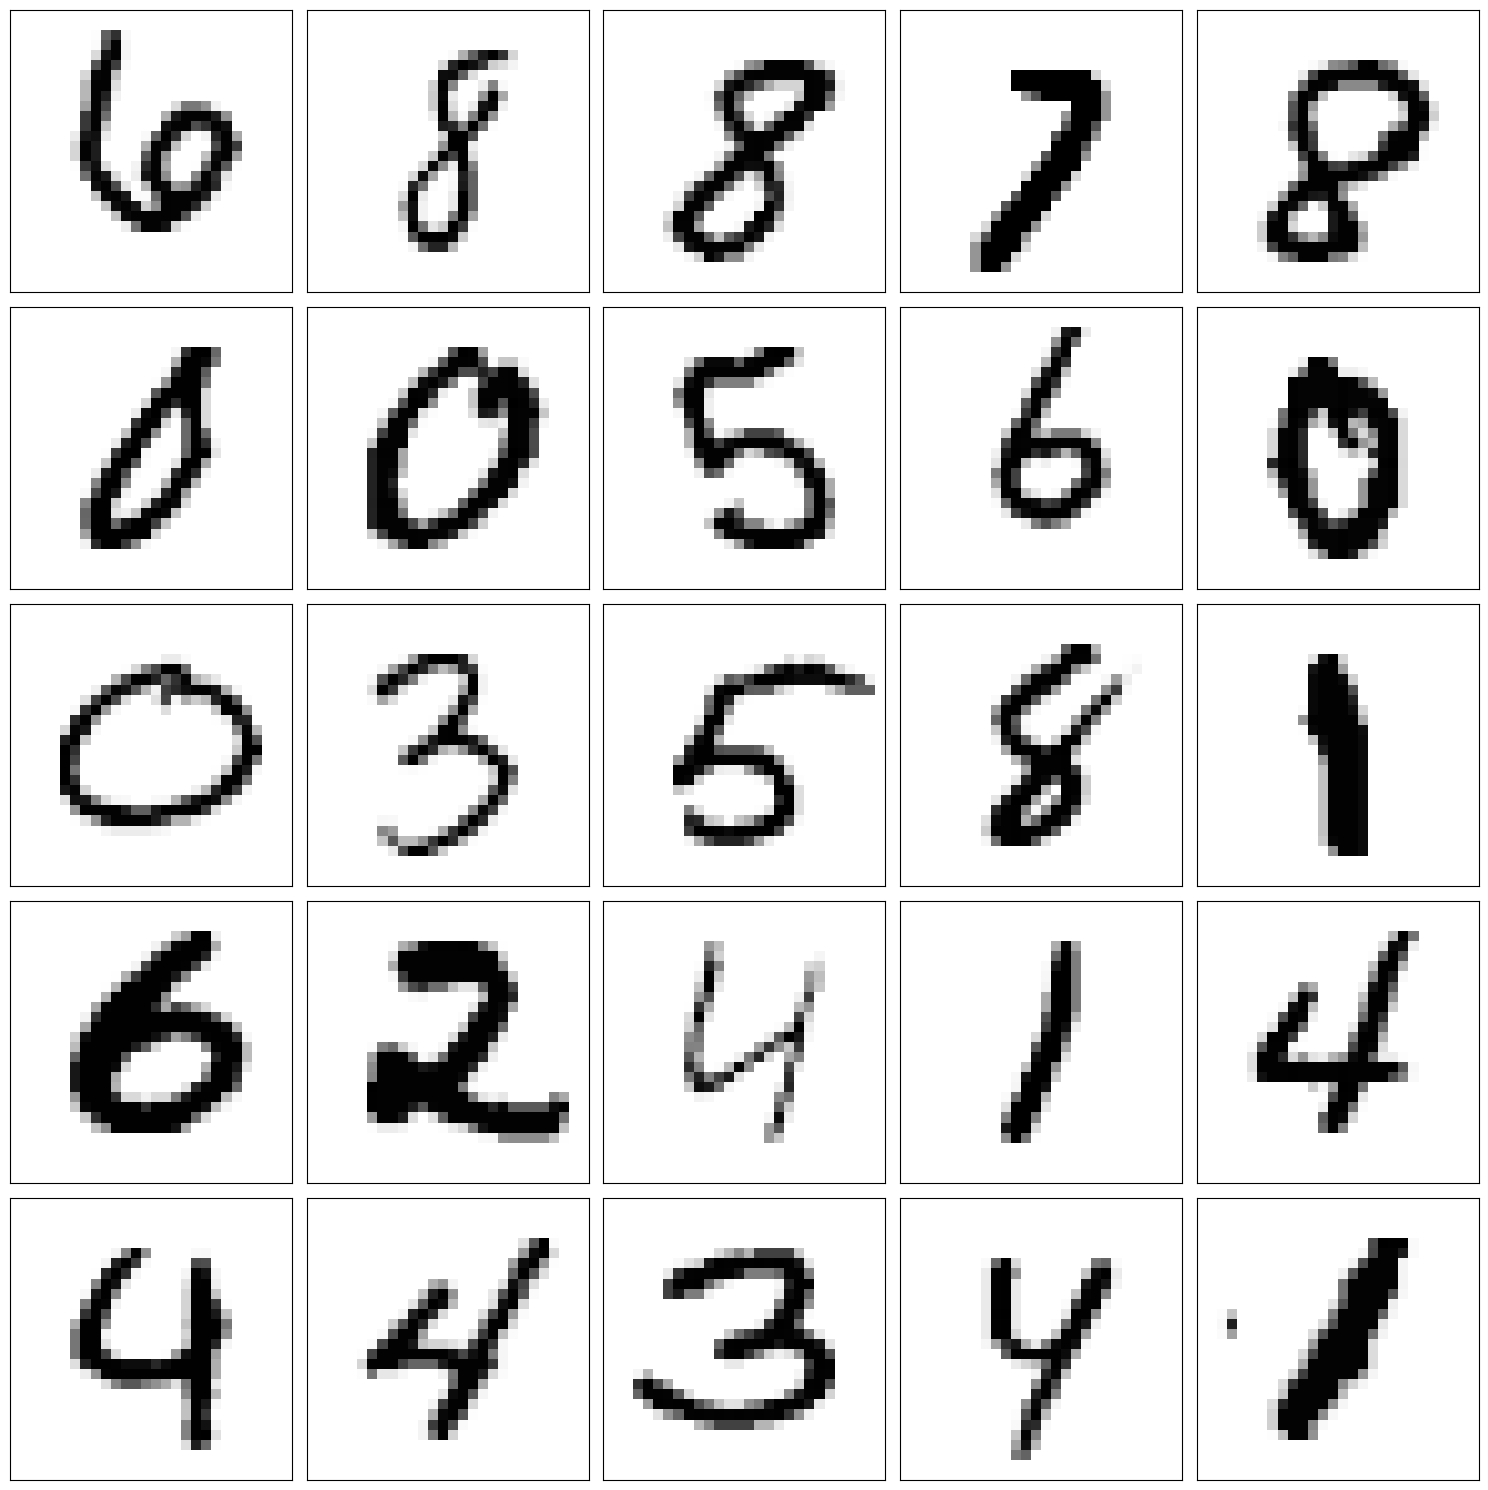

In [3]:
logger.info("Plotting samples from Train Loader")
plot_samples_from_dataloader(trainloader)

## Model Initialization and Training

The code demonstrates the initialization and training process of an autoencoder model using a defined configuration.

### Model Initialization

1. **Import Dependencies**: 
   The necessary classes are imported from the `src` package:
   - `Trainer` for managing the training process.
   - `Autoencoder` for creating the model architecture.

2. **Logging Initialization**: 
   A log message is generated to indicate the start of the model initialization.

3. **Create Autoencoder Model**: 
   An instance of the `Autoencoder` class is created with the following parameters from the configuration:
   - `img_height`: Height of the input images.
   - `img_width`: Width of the input images.
   - `hidden_dim`: Dimension of the hidden layers.
   - `latent_dim`: Dimension of the latent space.
   - `n_layers`: Number of layers in the autoencoder.
   - `layernorm`: Whether to apply layer normalization (optional).

   The model is then moved to the specified device (CPU or GPU).

### Model Training

1. **Logging Training Start**: 
   A log message indicates the commencement of the training process.

2. **Create Trainer Instance**: 
   An instance of the `Trainer` class is initialized, which takes the following parameters:
   - `model`: The autoencoder model.
   - `trainloader`: Data loader for training data.
   - `testloader`: Data loader for validation data.
   - `logger`: Logger instance for logging messages.

3. **Train the Model**: 
   The `train` method is called on the `trainer` instance with training parameters:
   - `learning_rate`: Learning rate for the optimizer.
   - `weight_decay`: Weight decay (L2 regularization).
   - `train_epochs`: Number of epochs for training.
   - `sched_gamma`: Scheduler gamma value for learning rate adjustment.
   - `device`: Device to be used for training.

4. **Log Training Completion**: 
   A log message indicates that the training is complete.


In [4]:
from src.train import Trainer
from src.models import Autoencoder
logger.info("Initializing Model")

model = Autoencoder(
    config["img_height"],
    config["img_width"],
    config["hidden_dim"],
    config["latent_dim"],
    config["n_layers"],
    layernorm=config["layernorm"],
)
model = model.to(config["device"])


logger.info("Training Model")

trainer = Trainer(model, trainloader, testloader, logger)
results = trainer.train(
    learning_rate=config["learning_rate"],
    weight_decay=config["weight_decay"],
    train_epochs=config["train_epochs"],
    sched_gamma=config["sched_gamma"],
    device=config["device"],
)

logger.info("Training Complete!")

2024-10-03 16:14:14,651 - INFO - Initializing Model
2024-10-03 16:14:14,862 - INFO - Training Model
2024-10-03 16:14:14,863 - INFO - Setting up Optimizer and Scheduler
2024-10-03 16:14:23,071 - INFO - epoch: 0	Train loss: 0.000448	Val loss: 0.000297	learning rate: 0.008886
2024-10-03 16:14:31,131 - INFO - epoch: 1	Train loss: 0.000254	Val loss: 0.000225	learning rate: 0.007897
2024-10-03 16:14:39,248 - INFO - epoch: 2	Train loss: 0.000205	Val loss: 0.000192	learning rate: 0.007018
2024-10-03 16:14:47,316 - INFO - epoch: 3	Train loss: 0.000180	Val loss: 0.000177	learning rate: 0.006236
2024-10-03 16:14:55,363 - INFO - epoch: 4	Train loss: 0.000165	Val loss: 0.000159	learning rate: 0.005542
2024-10-03 16:15:03,358 - INFO - epoch: 5	Train loss: 0.000154	Val loss: 0.000149	learning rate: 0.004925
2024-10-03 16:15:11,438 - INFO - epoch: 6	Train loss: 0.000144	Val loss: 0.000140	learning rate: 0.004376
2024-10-03 16:15:19,476 - INFO - epoch: 7	Train loss: 0.000137	Val loss: 0.000136	learning

## Save/Load your models and results!

This code demonstrates how to save and load both experiment results and a trained model using utility functions from `src.utils`. The steps are as follows:

1. **Saving**:
   - **Results** are saved as a pickle file using `save_pickle`.
   - **Model** is saved using `save_model`.

2. **Loading**:
   - **Results** are loaded from a pickle file using `load_pickle`.
   - **Model** is loaded using `load_model` and moved to the appropriate device with `to(config["device"])`.

Logging statements are used throughout to provide information about the paths being used for saving and loading.


In [5]:
# save results and model
from src.utils import save_model, load_model, save_pickle, load_pickle

logger.info(f"Saving results to {config['save_results_path']}")
save_pickle(results, config["save_results_path"])

logger.info(f"Saving model to {config['save_model_path']}")
save_model(model, config["save_model_path"])

2024-10-03 16:15:35,082 - INFO - Saving results to ../results/notebook_train_results.pkl
2024-10-03 16:15:35,083 - INFO - Saving model to ../checkpoints/notebook_autoencoder_model.pth


In [6]:
# load results and model
logger.info(f"Loading pickle from to {config['save_results_path']}")
loaded_results = load_pickle(config["save_results_path"])

logger.info(f"Loading model from to {config['save_model_path']}")
loaded_model = load_model(config)
loaded_model = loaded_model.to(config["device"])

2024-10-03 16:15:35,099 - INFO - Loading pickle from to ../results/notebook_train_results.pkl
2024-10-03 16:15:35,100 - INFO - Loading model from to ../checkpoints/notebook_autoencoder_model.pth
/home/yenho/siplab-github-template/src/utils.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have

## Visualizing Results

This code visualizes the training results of the autoencoder model through a loss curve and reconstruction of test images.

### Plotting the Loss Curve

1. **Logging Information**: 
   A log message is generated to indicate that the loss curve is being plotted.

2. **Plot Loss Curve**: 
   The `plot_loss_curve` function is called with the training results as input. The loss curve provides insights into the model's performance over epochs, showing how the training and validation losses evolve.

### Visualizing Inference Results

1. **Disable Gradient Tracking**: 
   The context manager `torch.no_grad()` is used to prevent gradients from being calculated, which reduces memory usage and speeds up computation during inference.

2. **Fetch a Batch from Validation Set**: 
   A single batch of images and their corresponding labels is retrieved from the validation data loader (`testloader`).

3. **Move Data to Device**: 
   The images are transferred to the specified device (CPU or GPU) for processing.

4. **Reconstruct Images**: 
   The autoencoder model is used to reconstruct the input images. The reconstructed images are then moved back to the CPU for visualization.

5. **Plot Reconstruction**: 
   The `plot_reconstruction` function is called with the original images and their reconstructed counterparts. This visualization helps assess how well the autoencoder can recreate the input data, providing a qualitative measure of its performance.



2024-10-03 16:15:35,122 - INFO - Plotting loss curve plot


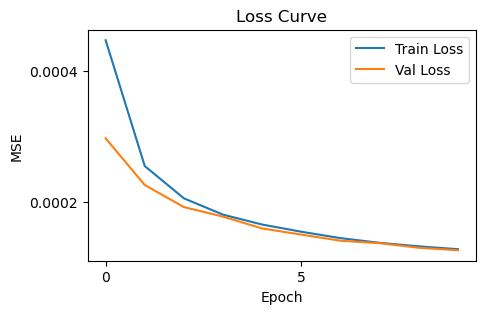

In [7]:
logger.info("Plotting loss curve plot")
plot_loss_curve(loaded_results, None)




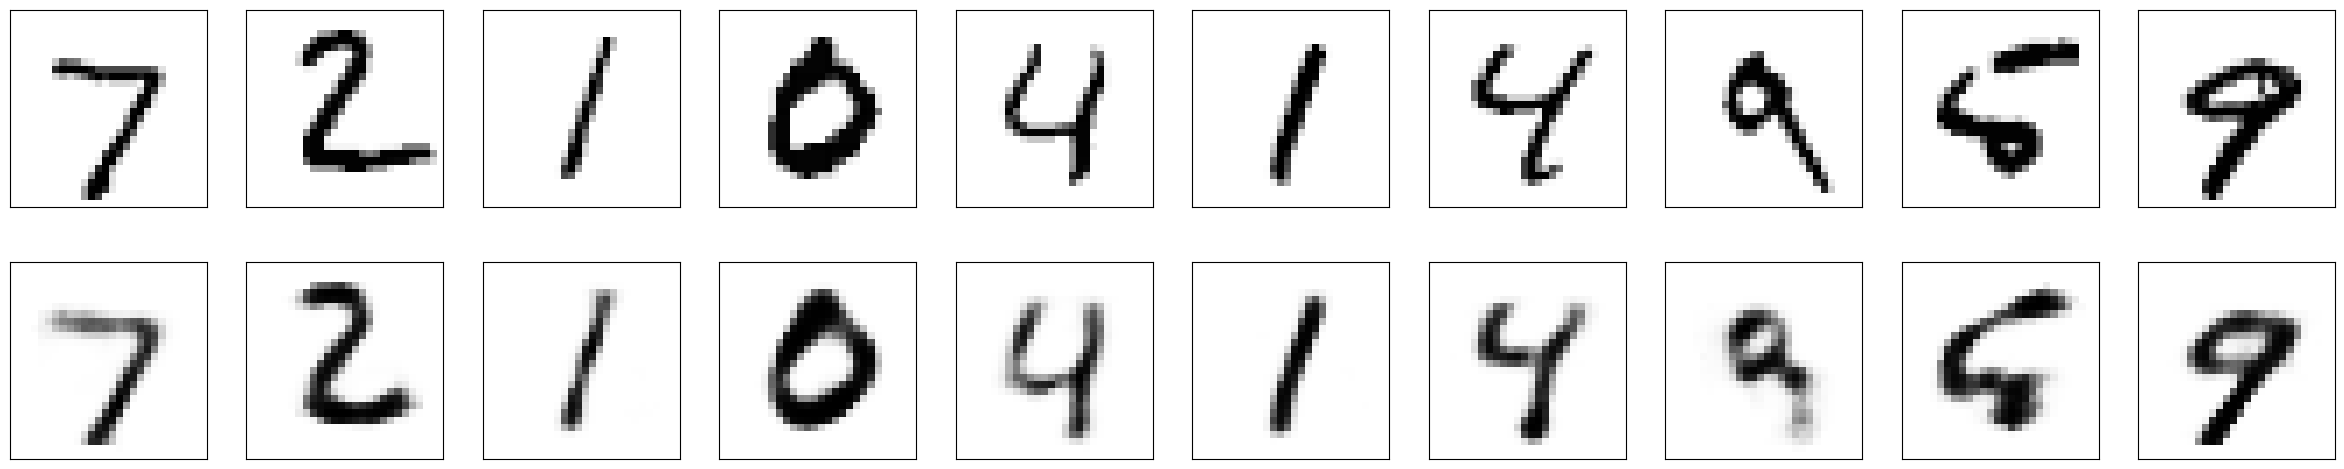

In [8]:
import torch

# plot inference for a single batch from the val set
with torch.no_grad():
    img, label = next(iter(testloader))
    img = img.to(config["device"])
    reconstructed = loaded_model(img)
    img = img.cpu()
    reconstructed = reconstructed.cpu()

plot_reconstruction(img, reconstructed)